In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
# Load the IMDB dataset (assuming it's a CSV with 'review' and 'sentiment' columns)
data = pd.read_csv("IMDB_Dataset.csv")  # Update path to your dataset
reviews = data['review'].values
labels = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

In [5]:
# Parameters
vocab_size = 10000
max_length = 200
embedding_dim = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [7]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [11]:
# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim),  # Removed deprecated input_length
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 168ms/step - accuracy: 0.5140 - loss: 0.6920 - val_accuracy: 0.5159 - val_loss: 0.6891
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.5161 - loss: 0.6884 - val_accuracy: 0.4963 - val_loss: 0.6872
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.5156 - loss: 0.6877 - val_accuracy: 0.5581 - val_loss: 0.6759
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.6927 - loss: 0.5872 - val_accuracy: 0.8218 - val_loss: 0.4041
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 170ms/step - accuracy: 0.8558 - loss: 0.3612 - val_accuracy: 0.8610 - val_loss: 0.3295


In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.8596 - loss: 0.3320

Test Accuracy: 86.10%


In [21]:
# Additional evaluation metrics
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86      4961
    Positive       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [23]:
# Save the model in modern Keras format
model.save('imdb_review_classifier.keras')

In [25]:
# Sample predictions
sample_reviews = [
    "This movie was fantastic, great acting and plot!",
    "Terrible film, boring and poorly written.",
    "An average movie with some good moments but weak storyline.",
    "Absolutely loved it, a masterpiece of cinema!"
]
print("\nSample Predictions:")
for review in sample_reviews:
    seq = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    prob = model.predict(padded)[0][0]
    label = 'Positive' if prob > 0.5 else 'Negative'
    print(f"Review: {review}")
    print(f"Prediction: {label} (Probability: {prob:.4f})\n")


Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Review: This movie was fantastic, great acting and plot!
Prediction: Positive (Probability: 0.9191)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Review: Terrible film, boring and poorly written.
Prediction: Negative (Probability: 0.0605)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Review: An average movie with some good moments but weak storyline.
Prediction: Negative (Probability: 0.0673)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Review: Absolutely loved it, a masterpiece of cinema!
Prediction: Positive (Probability: 0.9171)



In [27]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

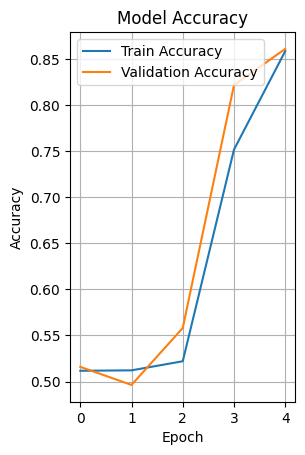

In [29]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

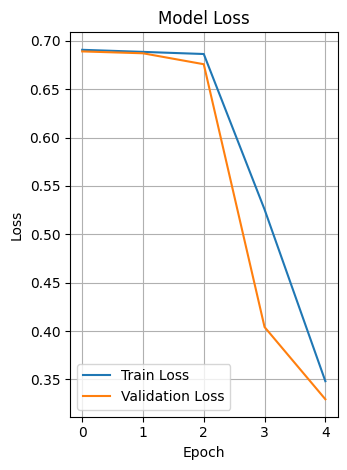

In [31]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [33]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 200, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (64, 200, 64)          │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, 200, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (64, 32)               │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (64, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 16)               │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 1)                │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,165,605 (12.08 MB)

 Trainable params: 1,055,201 (4.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,110,404 (8.05 MB)